# Employee Attrition Prediction Using Machine Learning Decision Trees

## Task 1: Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
#load the dataset
df = pd.read_csv("employee_attrition_dataset.csv")

#Show some highlevel information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [3]:
#List the first 5 rows of the data
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#List the last 5 rows of the data
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
#Show some statistical information about the data
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
#Show all the columns in the dataframe
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
#Check for duplicate values
df.duplicated().sum()

0

In [8]:
#Display the unique values for the following columns
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [9]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [10]:
df['EmployeeNumber'].unique()

array([   1,    2,    4, ..., 2064, 2065, 2068])

In [11]:
df['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [12]:
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [13]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [14]:
df['JobLevel'].unique()

array([2, 1, 3, 4, 5])

In [15]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [16]:
df['Education'].unique()

array([2, 1, 4, 3, 5])

In [17]:
#Check for missing values in the dataset
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [18]:
#Remove redundant columns from the dataset
emp_data = df.drop(['EmployeeCount', 'RelationshipSatisfaction', 'StockOptionLevel', 'EmployeeNumber',
                    'NumCompaniesWorked', 'Over18', 'TotalWorkingYears', 'MaritalStatus', 'BusinessTravel'], axis=1)

emp_data.head()

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PercentSalaryHike,PerformanceRating,StandardHours,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,1102,Sales,1,2,Life Sciences,2,Female,94,...,Yes,11,3,80,0,1,6,4,0,5
1,49,No,279,Research & Development,8,1,Life Sciences,3,Male,61,...,No,23,4,80,3,3,10,7,1,7
2,37,Yes,1373,Research & Development,2,2,Other,4,Male,92,...,Yes,15,3,80,3,3,0,0,0,0
3,33,No,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,Yes,11,3,80,3,3,8,7,3,0
4,27,No,591,Research & Development,2,1,Medical,1,Male,40,...,No,12,3,80,3,3,2,2,2,2


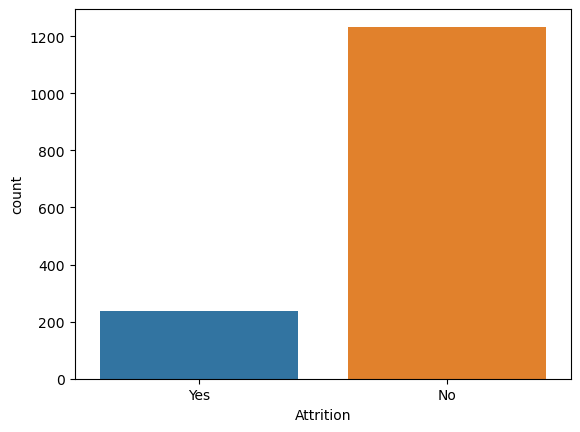

In [19]:
#Explore the distribution of a target attribute Attrition
import seaborn as sns

#sns.countplot(df['Attrition']).unique()
#correlation = emp_data.corr()
#sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels='Attrition', annot=True)
#emp_data['Attrition'].plot(kind = 'hist')

#sns.relplot(x = 'PerformanceRating', y = 'PercentSalaryHike', hue= 'Attrition', data=emp_data)
#emp_data['Attrition'].value_counts().plot(kind='bar')

sns.countplot(x='Attrition', data=emp_data, )
plt.show()

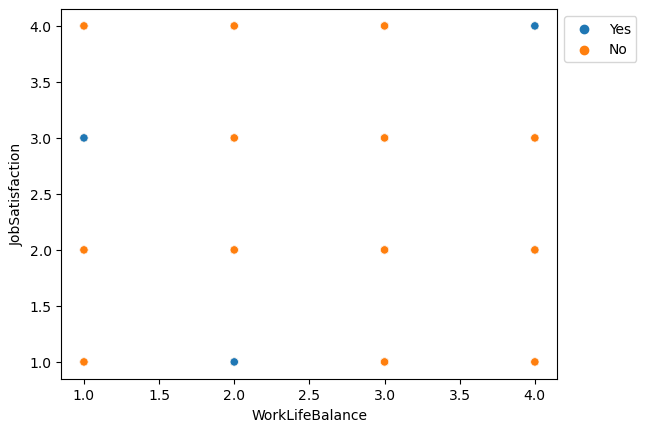

In [20]:
#Comparing attributes

sns.scatterplot(x = 'WorkLifeBalance', y='JobSatisfaction', hue='Attrition', data=emp_data,)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

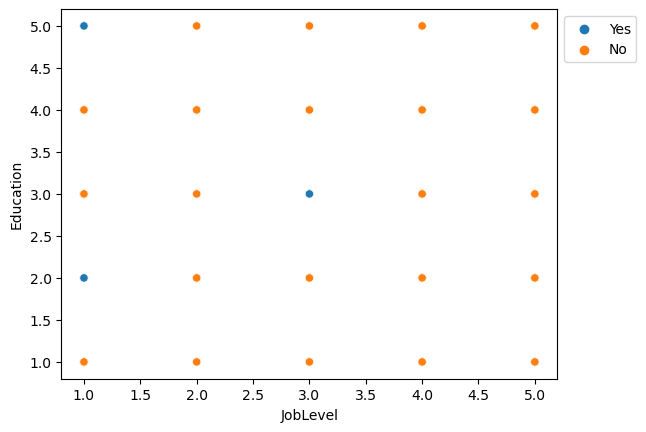

In [21]:
sns.scatterplot(x = 'JobLevel', y='Education', hue='Attrition', data=emp_data,)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

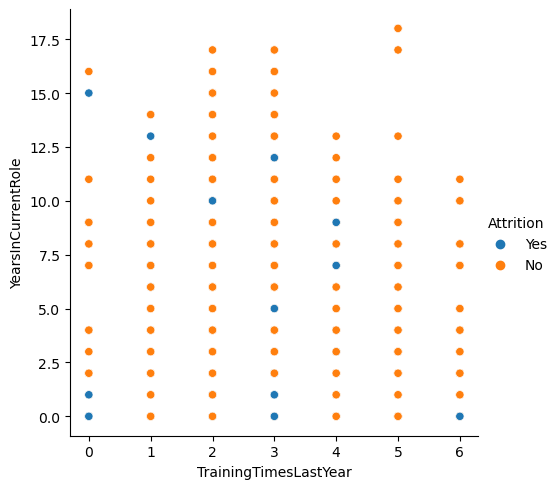

In [22]:
sns.relplot(x = 'TrainingTimesLastYear', y = 'YearsInCurrentRole', hue= 'Attrition', data=emp_data)

## Task 2: Feature selection And Importance Analysis

In [23]:
#Using the make_column_selector helper function from sci-kit learn to get columns based on their data type
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(emp_data)
categorical_columns

['Attrition', 'Department', 'EducationField', 'Gender', 'JobRole', 'OverTime']

In [24]:
data_categorical = emp_data[categorical_columns]
data_categorical.head()

,Attrition,Department,EducationField,Gender,JobRole,OverTime
0,Yes,Sales,Life Sciences,Female,Sales Executive,Yes
1,No,Research & Development,Life Sciences,Male,Research Scientist,No
2,Yes,Research & Development,Other,Male,Laboratory Technician,Yes
3,No,Research & Development,Life Sciences,Female,Research Scientist,Yes
4,No,Research & Development,Medical,Male,Laboratory Technician,No


In [25]:
#Encoding Categorical Values using OneHot Encoding
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(sparse_output=False, drop='first').set_output(transform="pandas")
data_encoded = encoder.fit_transform(data_categorical)
data_encoded.head()

,Attrition_Yes,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
#Get the numerical columns using the make_column_selector
numerical_columns_selector = selector(dtype_include=int)
numerical_columns = numerical_columns_selector(emp_data)
numerical_columns

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'PercentSalaryHike',
 'PerformanceRating',
 'StandardHours',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [27]:
data_numerical = emp_data[numerical_columns]
data_numerical.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,StandardHours,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,19479,11,3,80,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,24907,23,4,80,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,2396,15,3,80,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,23159,11,3,80,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,16632,12,3,80,3,3,2,2,2,2


In [28]:
#Scaling numerical features
from sklearn.preprocessing import StandardScaler

# Initialise the Scaler
scaler = StandardScaler()

cols= ['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate',
       'JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','PercentSalaryHike',
       'PerformanceRating','StandardHours','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany',
       'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
 
# To scale data
scaled_data = scaler.fit_transform(data_numerical)
scaled_data = pd.DataFrame(scaled_data, columns=cols)
scaled_data.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,StandardHours,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,0.726020,-1.150554,-0.426230,0.0,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,1.488876,2.129306,2.346151,0.0,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,-1.674841,-0.057267,-0.426230,0.0,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,1.243211,-1.150554,-0.426230,0.0,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,0.325900,-0.877232,-0.426230,0.0,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227


In [29]:
#Combine the encoded dataframe with the scaled dataframe
new_emp_data = pd.concat([scaled_data, data_encoded], axis=1)
new_emp_data.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
new_emp_data.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike',
       'PerformanceRating', 'StandardHours', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Yes',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'OverTime_Yes'],
      dtype='object')

In [31]:
#Feature selection using tree based models

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

X = new_emp_data[['Age', 'DailyRate', 'DistanceFromHome', 'Education','EnvironmentSatisfaction', 
                 'HourlyRate', 'JobInvolvement', 'JobLevel','JobSatisfaction', 'MonthlyIncome', 
                 'MonthlyRate', 'PercentSalaryHike','PerformanceRating', 'StandardHours', 
                 'TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
                 'YearsSinceLastPromotion', 'YearsWithCurrManager','Department_Research & Development',
                 'Department_Sales','EducationField_Life Sciences', 'EducationField_Marketing',
                 'EducationField_Medical', 'EducationField_Other','EducationField_Technical Degree', 
                 'Gender_Male','JobRole_Human Resources', 'JobRole_Laboratory Technician','JobRole_Manager', 
                 'JobRole_Manufacturing Director','JobRole_Research Director', 'JobRole_Research Scientist',
                 'JobRole_Sales Executive', 'JobRole_Sales Representative','OverTime_Yes']]

y = new_emp_data['Attrition_Yes']

# Create and fit a Decision Tree model
model = DecisionTreeClassifier()
model.fit(X, y)  # X are the features, y is the target variable

# Access feature importances
feature_importances = model.feature_importances_

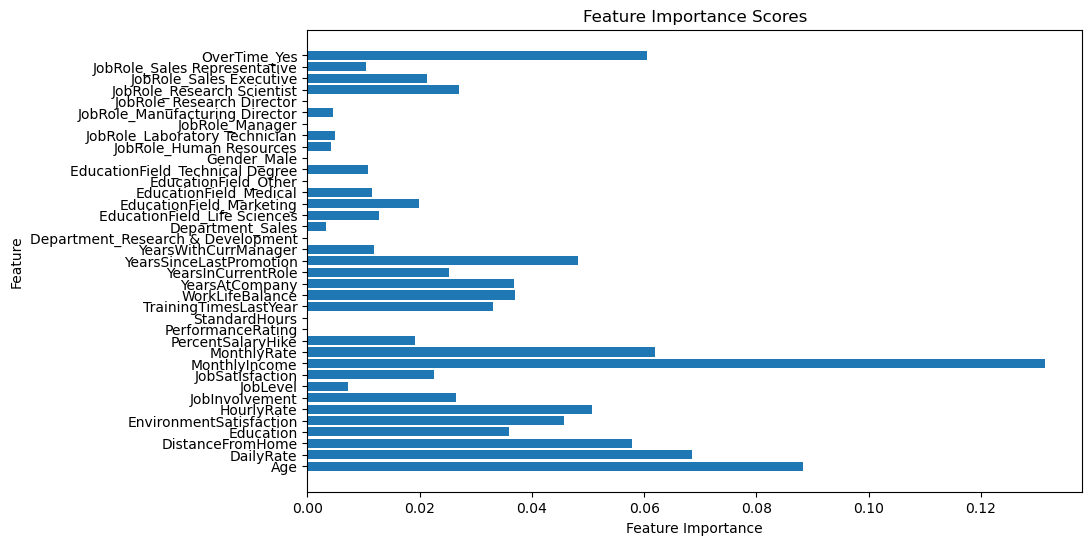

In [32]:
#Visualize feature Importance

feature_names = list(X.columns)  
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(range(len(feature_importances)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Scores')
plt.show()

In [33]:
#Getting feature importance using correlation

target = new_emp_data['Attrition_Yes']

# Calculate Pearson correlation coefficients
correlations = new_emp_data.drop(columns=['Attrition_Yes']).apply(lambda x: x.corr(target))

# Take absolute values and sort in descending order
correlations = correlations.abs().sort_values(ascending=False)

# Print the ranked feature importances
print(correlations)

OverTime_Yes                         0.246118
JobLevel                             0.169105
YearsInCurrentRole                   0.160545
MonthlyIncome                        0.159840
Age                                  0.159205
JobRole_Sales Representative         0.157234
YearsWithCurrManager                 0.156199
YearsAtCompany                       0.134392
JobInvolvement                       0.130016
JobSatisfaction                      0.103481
EnvironmentSatisfaction              0.103369
JobRole_Laboratory Technician        0.098290
JobRole_Research Director            0.088870
Department_Research & Development    0.085293
JobRole_Manager                      0.083316
JobRole_Manufacturing Director       0.082994
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
WorkLifeBalance                      0.063939
TrainingTimesLastYear                0.059478
DailyRate                         

## Task 3: Model Building

In [34]:
#Selecting Features basing on importance

drops = ['JobLevel', 'PerformanceRating', 'StandardHours', 'Department_Research & Development',
         'Department_Sales', 'EducationField_Life Sciences', 'EducationField_Medical', 'EducationField_Other',
         'EducationField_Technical Degree', 'Gender_Male', 'JobRole_Human Resources', 
         'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director',
         'JobRole_Research Director', 'JobRole_Sales Representative']

new_emp_data = new_emp_data.drop(columns= drops)
new_emp_data.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition_Yes', 'EducationField_Marketing',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'OverTime_Yes'],
      dtype='object')

In [40]:
#Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

X = new_emp_data[['Age', 'DistanceFromHome', 'Education','EnvironmentSatisfaction', 'JobSatisfaction',
                 'JobInvolvement','MonthlyIncome', 'PercentSalaryHike','TrainingTimesLastYear',
                 'WorkLifeBalance', 'YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion', 
                 'YearsWithCurrManager', 'EducationField_Marketing','JobRole_Research Scientist',
                 'OverTime_Yes', 'HourlyRate', 'DailyRate', 'MonthlyRate']]

y = new_emp_data['Attrition_Yes']

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
#Training the model and fine-tune hyperparameters of the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

#create a decision tree with an entropy criterion
model = DecisionTreeClassifier(random_state=100)

#specify a dictionary of hyperparameters with the desired values to be used when fine tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 5, 10],
}

#GridSearchCV object to perform grid search over the hyperparameters.
#classifier is the model, param_grid is the dictionary of hyperparameters, cv is the number of cross-validation
#folds and accuracy is the scoring metric
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')


#fit the model
grid_search.fit(X_train, y_train)

#get the best hyperparameters
best_params = grid_search.best_params_
best_classifier = grid_search.best_estimator_

## Task 4: Model Training, Testing and Evaluation

In [47]:
#Making predictions
y_predictions = best_classifier.predict(X_test)

#Evaluating Performance of the model
accuracy = accuracy_score(y_test, y_predictions)*100
confusion = confusion_matrix(y_test, y_predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Report : ", classification_report(y_test, y_predictions))


Accuracy: 83.33333333333334
Confusion Matrix:
 [[239  16]
 [ 33   6]]
Report :                precision    recall  f1-score   support

         0.0       0.88      0.94      0.91       255
         1.0       0.27      0.15      0.20        39

    accuracy                           0.83       294
   macro avg       0.58      0.55      0.55       294
weighted avg       0.80      0.83      0.81       294



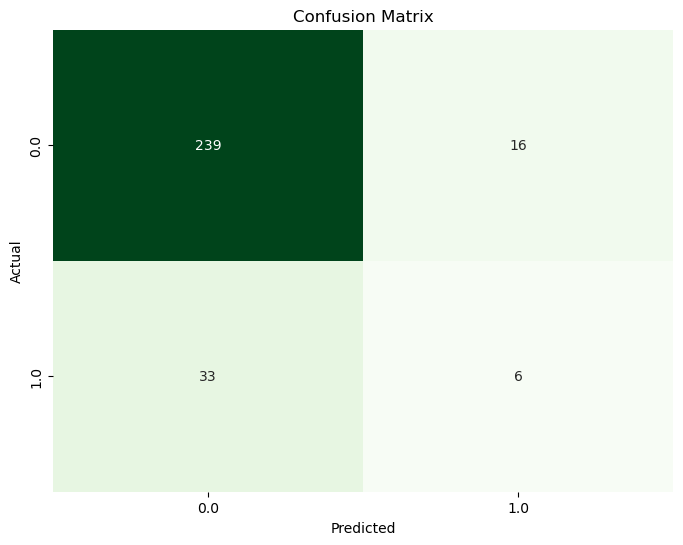

In [48]:
#Visualizing the performance of a decision tree using a confusion matrix
# Create a heatmap of the confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=grid_search.classes_, yticklabels=grid_search.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Discussing the results Accuracy and Confusion matrix

The model correctly predicts the employee attrition status in about 83.33% of the cases.

True Positives (TP, 239): The model correctly predicted that an employee would leave the company (attrition = 1), and the employee did leave.

True Negatives (TN, 6): The model correctly predicted that an employee would not leave the company (attrition = 0), and the employee did not leave.

False Positives (FP, 16): The model incorrectly predicted that an employee would leave (attrition = 1), but the employee did not leave.

False Negatives (FN, 33): The model incorrectly predicted that an employee would not leave (attrition = 0), but the employee did leave.


#Discussing precision and recall

Precision (0.88 for class 0.0 and 0.27 for class 1.0): 

Precision measures the accuracy of positive predictions. For employees who didn't leave (class 0.0), the precision is high at 0.88, meaning that when the model predicts that an employee will stay, it's correct 88% of the time. 

For employees who did leave (class 1.0), the precision is lower at 0.27, indicating that when the model predicts attrition, it's correct 27% of the time.


Recall (0.94 for class 0.0 and 0.15 for class 1.0): 

Recall measures the ability of the model to correctly identify positive instances. For employees who didn't leave, the recall is high at 0.94, indicating that the model correctly identifies 94% of employees who stayed. 

For employees who did leave, the recall is lower at 0.15, suggesting that the model only captures 15% of employees who actually left.